---
---

<img src="logo_univ.png" width=250px align="right"></span>

# <span style="background-color: "> **_Modélisation des prix dans      le secteur de l'immobilier à Lyon_** </span>

### **_Projet introduction au Machine Learning en Python | Partie 3 : Machine Learning_**

Jeudi 2 Juin 2022

##### <div style="text-align:right;">Projet réalisé par : Gaoussou Diakité, Abir Khan, Anis Louissi, Camil Zahi</div>
<div style="text-align:right;">Sous la direction de : Guillaume Clement & Paul Thavenot </div>

---
---

In [14]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn
from sklearn.model_selection import KFold,  cross_val_score, train_test_split
from pylab import pcolor, show, colorbar, xticks, yticks
plt.style.use("ggplot") #uniquement esthétique
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

---
<h3><center> Les données </center></h3>

In [15]:
# On lit les données
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")

In [16]:
# On garde les colonnes les plus importantes d'après l'analyse des corrélations
X1 = X.copy()
colonnes_importantes = [
'Climatisation_Oui',
'Type_Shared room',
'Localisation',
'Nombre de salle de bain',
'Type de salle de bain_Partagée',
'Nombre de chambres',
'Type_Private room',
'Nombre de lits',
"Nombre d'invités"]
X = pd.read_csv('X.csv', 
                usecols=colonnes_importantes)
X

,Localisation,Nombre d'invités,Nombre de chambres,Nombre de lits,Nombre de salle de bain,Type_Private room,Type_Shared room,Type de salle de bain_Partagée,Climatisation_Oui
0,0.220335,1.838142,1.933158,2.227614,3.490797,-0.570036,-0.089054,-0.436253,-0.327363
1,0.617174,0.563712,-0.050807,-0.618954,-0.162716,-0.570036,-0.089054,-0.436253,3.054716
2,-1.367019,1.838142,1.933158,2.227614,-0.162716,-0.570036,-0.089054,-0.436253,-0.327363
3,-0.573342,1.838142,0.941175,0.329902,3.490797,-0.570036,-0.089054,-0.436253,-0.327363
4,-1.367019,-0.710718,-0.050807,-0.618954,-0.162716,-0.570036,-0.089054,-0.436253,-0.327363
...,...,...,...,...,...,...,...,...,...
6731,1.410851,-1.347933,-0.050807,-0.618954,-0.162716,-0.570036,-0.089054,-0.436253,-0.327363
6732,-0.970181,-0.710718,-2.034771,-0.618954,-0.162716,-0.570036,-0.089054,-0.436253,-0.327363
6733,-0.573342,0.563712,-0.050807,-0.618954,-0.162716,-0.570036,-0.089054,-0.436253,-0.327363
6734,-0.970181,0.563712,-0.050807,-0.618954,-0.162716,-0.570036,-0.089054,-0.436253,3.054716


In [17]:
# Matrice des corrélations
corr_matrice = X[['Climatisation_Oui',
'Type_Shared room',
'Localisation',
'Nombre de salle de bain',
'Type de salle de bain_Partagée',
'Nombre de chambres',
'Type_Private room',
'Nombre de lits',
"Nombre d'invités"]].corr().abs()
corr_matrice

,Climatisation_Oui,Type_Shared room,Localisation,Nombre de salle de bain,Type de salle de bain_Partagée,Nombre de chambres,Type_Private room,Nombre de lits,Nombre d'invités
Climatisation_Oui,1.000000,0.012105,0.003187,0.056796,0.038696,0.035166,0.030229,0.061309,0.049524
Type_Shared room,0.012105,1.000000,0.014954,0.014490,0.199549,0.004525,0.050764,0.023234,0.069716
Localisation,0.003187,0.014954,1.000000,0.020756,0.063169,0.006922,0.043029,0.028025,0.041917
Nombre de salle de bain,0.056796,0.014490,0.020756,1.000000,0.041387,0.276355,0.041066,0.252848,0.253819
Type de salle de bain_Partagée,0.038696,0.199549,0.063169,0.041387,1.000000,0.018548,0.713525,0.226589,0.323733
Nombre de chambres,0.035166,0.004525,0.006922,0.276355,0.018548,1.000000,0.029304,0.559488,0.584361
Type_Private room,0.030229,0.050764,0.043029,0.041066,0.713525,0.029304,1.000000,0.289308,0.393921
Nombre de lits,0.061309,0.023234,0.028025,0.252848,0.226589,0.559488,0.289308,1.000000,0.776978
Nombre d'invités,0.049524,0.069716,0.041917,0.253819,0.323733,0.584361,0.393921,0.776978,1.000000


---
<h3><center> Modélisation </center></h3>

Dans un premier temps, nous allons entraîner plusieurs modèles de Machine Learning et comparer leurs résultats. Les résultats sont obtenus par validation croisée (en  passes) : le jeu d'entraînement est aléatoirement découpé en  blocs distincts, puis effectue l'entraînement puis l'évaluation du modèle en  passes successives, réservant à chaque fois un bloc différent pour l'évaluation et effectuant l'entraînement sur les neufs autres blocs.

L'étude des corrélations à mis en avant le caractère "linéaire" des corrélations entre la variable cible et les variables d'apprentissage les plus pertinentes. Nous allons donc commençer par entraîner un modèle de régression linéaire.

---
<h3><center> Régression Linéaire </center></h3>

In [18]:
# On split la base de données en 2
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2 ,random_state = 79)
print("Xtrain shape: " , Xtrain.shape)
print("Xtest shape : " , Xtest.shape)
print("ytrain shape : " , ytrain.shape)
print("ytest shape: " , ytest.shape)

Xtrain shape:  (5388, 9)
Xtest shape :  (1348, 9)
ytrain shape :  (5388, 1)
ytest shape:  (1348, 1)


In [19]:
# Régression linéaire
regresseur = LinearRegression( )
regresseur.fit(Xtrain, ytrain)

LinearRegression()

In [20]:
# Prédictions
y_pred = regresseur.predict(Xtest)
y_pred

array([[4.20449736],
       [3.94002666],
       [3.80443431],
       ...,
       [4.2025471 ],
       [4.04178654],
       [3.83944724]])

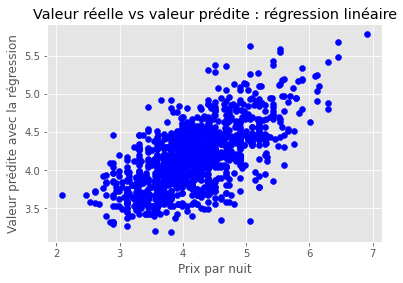

R2: 0.4132
MSE: 0.2495


In [21]:
# Modélisation
plt.scatter (ytest, y_pred, c = 'blue')
plt.xlabel("Prix par nuit")
plt.ylabel("Valeur prédite avec la régression")
plt.title( "Valeur réelle vs valeur prédite : régression linéaire" )
plt.show()
print('R2:',round(sklearn.metrics.r2_score(ytest, y_pred),4))
print('MSE:', round(mean_squared_error(y_pred,ytest),4))

##### Avec la régression linéaire, on arrive à expliquer 41,32% de la variance du prix avec les variables sélectionnées. La qualité de l'ajustement du modèle n'est plutôt pas mal.
##### Le MSE (Mean Squared Error, en français : l'erreur quadratique moyenne) est de 0.2495 : la variance de l'erreur de la prévision est très faible.

---
<h3><center> Régression Ridge </center></h3>

In [22]:
# On split la base de données en 2
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X, y, test_size = 0.2 ,random_state = 79)

In [23]:
# Régression Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(Xtrain2, ytrain2)
y_pred2=ridge.predict(Xtest2)

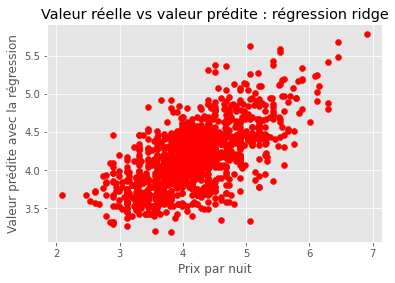

R2: 0.4132
MSE: 0.2495


In [24]:
# Modélisation
plt.scatter (ytest2, y_pred2, c = 'red')
plt.xlabel("Prix par nuit")
plt.ylabel("Valeur prédite avec la régression")
plt.title( "Valeur réelle vs valeur prédite : régression ridge" )
plt.show()
print('R2:',round(sklearn.metrics.r2_score(ytest2, y_pred2),4))
print('MSE:', round(mean_squared_error(y_pred2,ytest2),4))

##### Avec la régression Ridge, on arrive à expliquer 41,32% de la variance du prix avec les variables sélectionnées. La qualité de l'ajustement du modèle n'est plutôt pas mal.
##### Le MSE(Mean Squared Error, en français : l'erreur quadratique moyenne) est de 0.2495 : la variance de l'erreur de la prévision est très faible.

---
<h3><center> XGBOOST </center></h3>

In [25]:
# On split la base de données en 2
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X, y, test_size = 0.2 ,random_state = 79)

In [26]:
# Algorithme XGBOOST
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import  mean_squared_error, r2_score
# Running model a XGB Regressor
model = xgb.XGBRegressor()
# Fit the model on training data
model.fit(Xtrain3, ytrain3)
# Predict
pred_train = model.predict(Xtrain3)
# Validate
y_pred3 = model.predict(Xtest3)

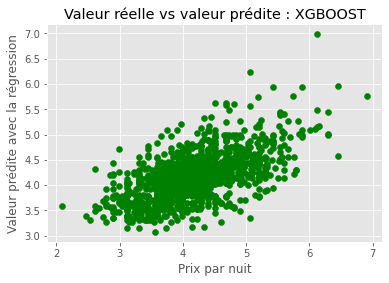

R2: 0.3614
MSE: 0.2715


In [27]:
# Modélisation
plt.scatter (ytest3, y_pred3, c = 'green')
plt.xlabel("Prix par nuit")
plt.ylabel("Valeur prédite avec la régression")
plt.title( "Valeur réelle vs valeur prédite : XGBOOST" )
plt.show()
print('R2:',round(sklearn.metrics.r2_score(ytest3, y_pred3),4))
print('MSE:', round(mean_squared_error(y_pred3,ytest3),4))

##### Avec le modèle XGBOOST, on arrive à expliquer 36,14% de la variance du prix avec les variables sélectionnées. La qualité de l'ajustement du modèle n'est plutôt pas mal.
##### Le MSE(Mean Squared Error, en français : l'erreur quadratique moyenne) est de 0.2715 : la variance de l'erreur de la prévision est très faible.

---
<h3><center> KNN </center></h3>

In [28]:
# On split la base de données en 2
Xtrain4, Xtest4, ytrain4, ytest4 = train_test_split(X, y, test_size = 0.2 ,random_state = 79)

In [29]:
# Algorithme des K plus proches voisins
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=23)
knn.fit(Xtrain4, ytrain4)
knn_pred = knn.predict(Xtest4)

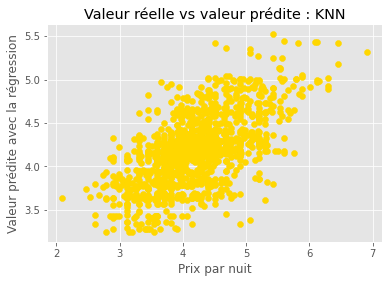

R2: 0.393
MSE: 0.2581


In [30]:
# Modélisation
plt.scatter (ytest4, knn_pred, c = 'gold')
plt.xlabel("Prix par nuit")
plt.ylabel("Valeur prédite avec la régression")
plt.title( "Valeur réelle vs valeur prédite : KNN" )
plt.show()
print('R2:',round(sklearn.metrics.r2_score(ytest4, knn_pred),4))
print('MSE:', round(mean_squared_error(knn_pred,ytest4),4))

##### Avec la régression KNN, on arrive à expliquer 39,3% de la variance du prix avec les variables sélectionnées. La qualité de l'ajustement du modèle n'est plutôt pas mal.
##### Le MSE(Mean Squared Error, en français : l'erreur quadratique moyenne) est de 0.2581 : la variance de l'erreur de la prévision est très faible.

---
<h3><center> Prédiction du prix avec le meilleur modèle de régression </center></h3>

La régression linéaire est celle qui donne les meilleurs résultats en se basant sur le R2 et sur le critère de MSE. **Nous retiendrons donc la régression linéaire.**

In [35]:
# Prédiction du prix par nuit enj fonction des caractéristiques du logements
localisation = int(input("Arrondissement (de 1 à 9) : "))
nb_invités = int(input("Nombre d'invités : "))
nb_chambres = int(input("Nombre de chambres : "))
nb_lits= int(input("Nombre de lits : "))
nb_sdb = int(input("Nombre de salle de bain : "))
chambre_privée = int(input("Type_Private room (1 si Oui, 0 si Non) : "))
chambre_partagée = int(input("Type_Shared room (1 si Oui, 0 si Non) : "))
sdb_partagée = int(input("Type de salle de bain_Partagée (1 si Oui, 0 si Non) : "))
climatisation = float(input("Climatisation_Oui (1 si Oui, 0 si Non) : "))
profile_test = [[localisation,nb_invités,nb_chambres,nb_lits,nb_sdb,chambre_privée,chambre_partagée,sdb_partagée,climatisation]]
prix = regresseur.predict(profile_test)
prix = str(np.exp(prix).round(2))
print("En fonction de ses caractéristiques, nous vous conseillons de fixer le prix du logement à :", prix, "€")

Arrondissement (de 1 à 9) :  2
Nombre d'invités :  4
Nombre de chambres :  2
Nombre de lits :  3
Nombre de salle de bain :  1
Type_Private room (1 si Oui, 0 si Non) :  1
Type_Shared room (1 si Oui, 0 si Non) :  0
Type de salle de bain_Partagée (1 si Oui, 0 si Non) :  0
Climatisation_Oui (1 si Oui, 0 si Non) :  1


En fonction de ses caractéristiques, nous vous conseillons de fixer le prix du logement à : [[144.32]] €


---
<h3><center> Classification </center></h3>

In [19]:
# Données
colonnes_importantes2 = ['log_Prix_nuit',
'Climatisation_Oui',
'Type_Shared room',
'Localisation',
'Nombre de salle de bain',
'Type de salle de bain_Partagée',
'Nombre de chambres',
'Type_Private room',
'Nombre de lits',
"Nombre d'invités"]
df_class = pd.read_csv('AIRBNB LYON encodé2.csv', usecols = colonnes_importantes2)
df_class

,Localisation,Nombre d'invités,Nombre de chambres,Nombre de lits,Nombre de salle de bain,Type_Private room,Type_Shared room,Type de salle de bain_Partagée,Climatisation_Oui,log_Prix_nuit
0,5,6,3,4,2,0,0,0,0,4.685644
1,6,4,1,1,1,0,0,0,1,4.375505
2,1,6,3,4,1,0,0,0,0,4.948050
3,3,6,2,2,2,0,0,0,0,4.685644
4,1,2,1,1,1,0,0,0,0,4.132282
...,...,...,...,...,...,...,...,...,...,...
6731,8,1,1,1,1,0,0,0,0,2.893700
6732,2,2,-1,1,1,0,0,0,0,4.160912
6733,3,4,1,1,1,0,0,0,0,3.769307
6734,2,4,1,1,1,0,0,0,1,4.542550


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [21]:
X = df_class.drop(['Type_Private room'],axis=1)
y = df_class['Type_Private room'].values

---
<h3><center> Régression Logistique </center></h3>

In [22]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

    print("Accuracy", metrics.accuracy_score(y_test, y_pred))

    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))

  
    auc = roc_auc_score(y_test, y_pred)
    print("AUC Score: ")
    print(auc)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plot_roc_curve(fpr, tpr)

Confusion matrix:
 [[1026    6]
 [  80  236]]


C:\Users\Camil\AppData\Local\Temp/ipykernel_32356/426580746.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Camil\AppData\Local\Temp/ipykernel_32356/426580746.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


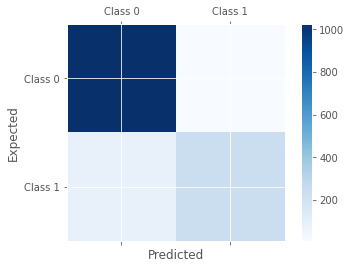

Accuracy 0.9362017804154302
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1032
           1       0.98      0.75      0.85       316

    accuracy                           0.94      1348
   macro avg       0.95      0.87      0.90      1348
weighted avg       0.94      0.94      0.93      1348

AUC Score: 
0.8705107447748013


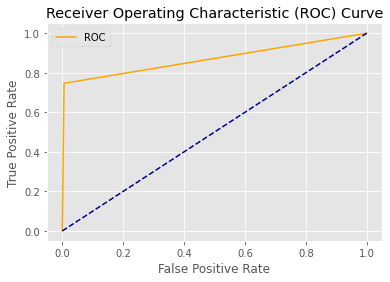

In [29]:
# Régression logistique
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classif_results()

##### 6 éléments ont été prédits négatifs alors qu'ils ne le sont pas, de même 80 éléments ont été prédits positifs alors qu'ils ne le sont pas.
##### 75% des observations positives ont été correctement detectées par la régression logistique.
##### 98% des prédictions positives ont été prédites correctement.
##### Le modèle est globalement performant à 94%.

---
<h3><center> KNN </center></h3>

Confusion matrix:
 [[988  44]
 [ 78 238]]


C:\Users\Camil\AppData\Local\Temp/ipykernel_32356/426580746.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Camil\AppData\Local\Temp/ipykernel_32356/426580746.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


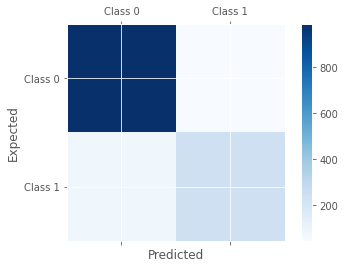

Accuracy 0.9094955489614244
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1032
           1       0.84      0.75      0.80       316

    accuracy                           0.91      1348
   macro avg       0.89      0.86      0.87      1348
weighted avg       0.91      0.91      0.91      1348

AUC Score: 
0.8552644490236484


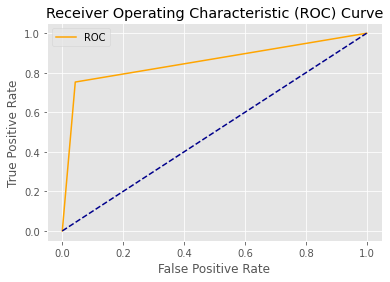

In [30]:
# Algorithme des k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classif_results()

##### Pour les K-plus-proches-voisins, 44 éléments ont été prédits négatifs alors qu'ils ne le sont pas, de même 78 éléments ont été prédits positifs alors qu'ils ne le sont pas.
##### 75% des observations positives ont été correctement detectées par la régression logistique.
##### 84% des prédictions positives ont été prédites correctement.
##### Le modèle est globalement performant de 91%.

---
<h3><center> Arbre de décision </center></h3>

Confusion matrix:
 [[967  65]
 [ 66 250]]


C:\Users\Camil\AppData\Local\Temp/ipykernel_32356/426580746.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Camil\AppData\Local\Temp/ipykernel_32356/426580746.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


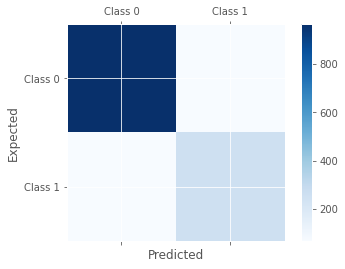

Accuracy 0.9028189910979229
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1032
           1       0.79      0.79      0.79       316

    accuracy                           0.90      1348
   macro avg       0.86      0.86      0.86      1348
weighted avg       0.90      0.90      0.90      1348

AUC Score: 
0.8640773721911491


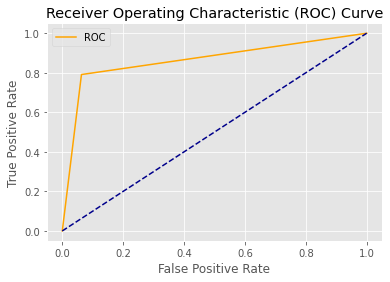

In [31]:
# Algorithme de l'arbre de décision
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classif_results()

##### Pour l'arbre de décision, 65 éléments ont été prédits négatifs alors qu'ils ne le sont pas, de même 66 éléments ont été prédits positifs alors qu'ils ne le sont pas.
##### 79% des observations positives ont été correctement détectées par l'arbre de décision.
##### 79% des prédictions positives ont été prédites correctement.
##### Le modèle est globalement performant de 90%.

---
<h3><center> Choix de modèle </center></h3>

<Figure size 432x288 with 0 Axes>

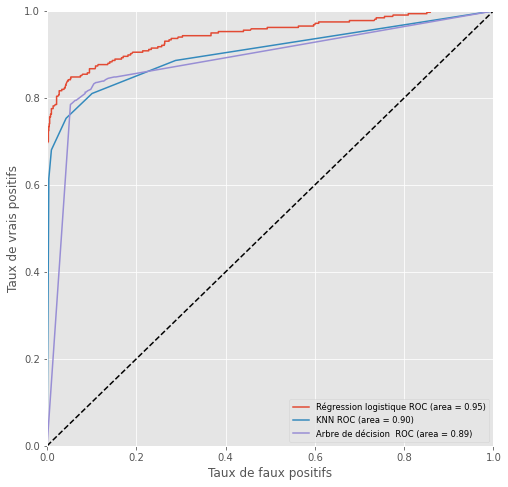

In [32]:
# On affiche les résultats des algorithmes 
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
des_model = tree.DecisionTreeClassifier()
models = [{'label': 'Régression logistique','model': lr_model},
          {'label': 'KNN','model': knn_model},
          {'label': 'Arbre de décision ','model': des_model}]
from sklearn.metrics import roc_curve, roc_auc_score, auc
plt.clf()
plt.figure(figsize=(8,8))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc=0, fontsize='small')
plt.show()

##### Notre choix se porte sur la régression logistique car sa courbe est la plus proche du coin nord ouest, c'est à dire l'AUC la plus élevée.